In [1]:
%load_ext autoreload
%autoreload 2

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from operator import itemgetter
# from sklearn.tree import _tree
import sklearn.metrics as metrics
# import pandas as pd
import matplotlib.pyplot as plt
import functions

In [2]:
target_a = 'TARGET_BAD_FLAG'
target_b = 'IMP_TARGET_LOSS_AMT'

In [3]:
df = functions.clean_df(file_path= '../../data_sets/SA_clean_HMEQ_Loss.csv', remove_cols=['z_JOB', 'z_REASON'])

In [4]:
train_cols = list(df.columns.difference((target_a, target_b)))
x_train, x_test, y_train, y_test = functions.split_df(df = df.copy(), train_cols=train_cols, 
test_cols = [target_a, target_b], test_size=0.2, rand_seed=1)

### Classification

In [5]:
GB = GradientBoostingClassifier(n_estimators=100, random_state=1)
GB = GB.fit(x_train, y_train[target_a])

In [6]:
GB_pred_train = GB.predict( x_train )
GB_pred_test = GB.predict(x_test )

In [7]:
#extracting probabi;ities
GB_prob_train= GB.predict_proba(x_train)
GB_prob_test= GB.predict_proba(x_test)

#keeping prob of default only
GB_p1_train= GB_prob_train[:,1]
GB_p1_test= GB_prob_test[:,1]

In [8]:
#checking accuracy predictions
#better on test than decision tree
print('Train Accuracy:', metrics.accuracy_score(y_train[target_a],GB_pred_train),'\n',
'Test Accuracy:',  metrics.accuracy_score(y_test[target_a],GB_pred_test))

Train Accuracy: 0.9228187919463087 
 Test Accuracy: 0.9026845637583892


In [9]:
#developing ROC curve
GB_fpr_train, GB_tpr_train, threshold_train = metrics.roc_curve(y_train[target_a], GB_p1_train)
GB_fpr_test, GB_tpr_test, threshold_test = metrics.roc_curve(y_test[target_a], GB_p1_test)

#AUC
GB_roc_auc_train = metrics.auc(GB_fpr_train, GB_tpr_train )
GB_roc_auc_test = metrics.auc(GB_fpr_test, GB_tpr_test)

c:\Users\salma\OneDrive\Desktop\Salma\NW\practical_machine_learning\Code\Module_2\functions.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_test, tpr_test, 'b', label = f'AUC TEST:{round(roc_auc_test,2)}', color= 'red')


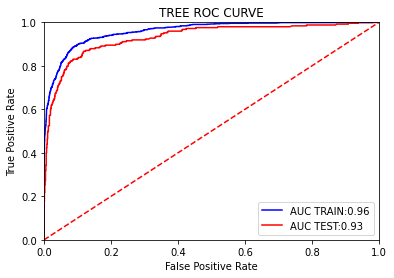

In [10]:
functions.plot_roc(fpr_train = GB_fpr_train, tpr_train= GB_tpr_train, fpr_test= GB_fpr_test, tpr_test= GB_tpr_test,
 roc_auc_train= GB_roc_auc_train, roc_auc_test= GB_roc_auc_test )

### Regression

In [11]:
#Filtering the train and test splits only on values with amount > 0 
#in clean up steps, missing amounts were filled with 0s...
#there were no zeros in the column prior to that
reg_y_train = y_train[y_train[target_a]==1]
reg_y_test = y_test[y_test[target_a]==1]
#subsetting based on index
reg_x_train =x_train[x_train.index.isin(reg_y_train.index)]  
reg_x_test = x_test[x_test.index.isin(reg_y_test.index)] 

# display (reg_y_train.head(), reg_y_test.head(), reg_x_train.head(),
#          reg_x_test.head(), (reg_y_train.index == reg_x_train.index).all(),
#         (reg_y_test.index == reg_x_test.index).all() )

In [12]:
GBR = GradientBoostingRegressor(n_estimators=100, random_state=1)
GBR = GBR.fit(reg_x_train, reg_y_train[target_a])

In [13]:
GBR_pred_train = GBR.predict( reg_x_train )
GBR_pred_test = GBR.predict(reg_x_test )

In [14]:
# Error Metric
GBR_train_rmse =metrics.mean_squared_error(reg_y_train[target_b], GBR_pred_train)**0.5
GBR_test_rmse = metrics.mean_squared_error(reg_y_test[target_b], GBR_pred_test)**0.5

In [15]:
GBR_train_rmse, GBR_test_rmse

(17137.13532938209, 17638.636153708234)

In [16]:
dict(zip(x_train.columns, GBR.feature_importances_))

{'IMP_CLAGE': 0.0,
 'IMP_CLNO': 0.0,
 'IMP_DEBTINC': 0.0,
 'IMP_DELINQ': 0.0,
 'IMP_DEROG': 0.0,
 'IMP_LOAN': 0.0,
 'IMP_MORTDUE': 0.0,
 'IMP_NINQ': 0.0,
 'IMP_VALUE': 0.0,
 'IMP_YOJ': 0.0,
 'flag_CLAGE': 0.0,
 'flag_CLNO': 0.0,
 'flag_DEBTINC': 0.0,
 'flag_DELINQ': 0.0,
 'flag_DEROG': 0.0,
 'flag_LOAN': 0.0,
 'flag_MORTDUE': 0.0,
 'flag_NINQ': 0.0,
 'flag_VALUE': 0.0,
 'flag_YOJ': 0.0,
 'z_JOB_Office': 0.0,
 'z_JOB_Other': 0.0,
 'z_JOB_ProfExe': 0.0,
 'z_JOB_Sales': 0.0,
 'z_JOB_Self': 0.0,
 'z_REASON_HomeImp': 0.0}